### Loan Approval EDA Project

## 1. Introduction
### In this project, we perform an exploratory data analysis (EDA) on a home loan approval dataset to identify patterns, trends, and potential insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv("C:/Users/Admin/Desktop/Loan Approval/loan_sanction_test.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(df.shape)
df.info()
df.describe()

(367, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [6]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


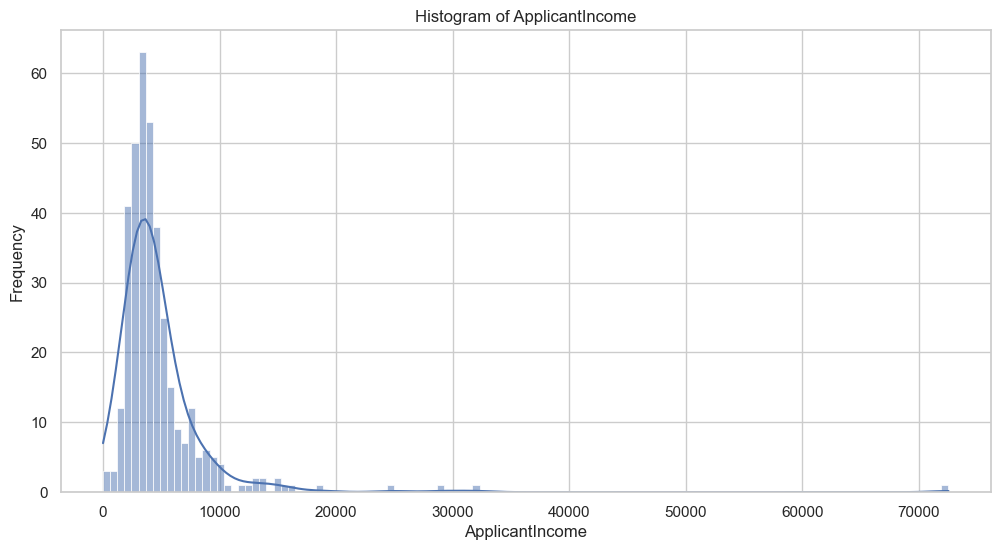

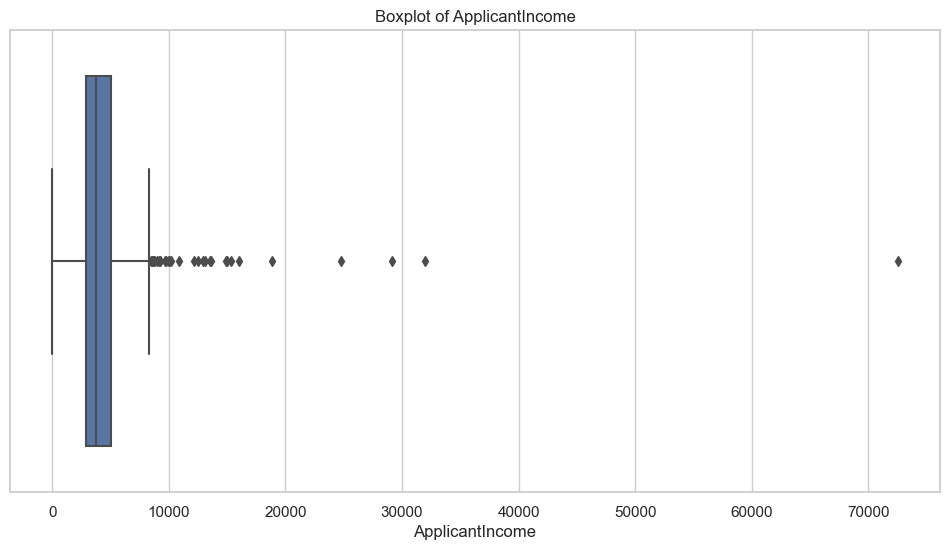

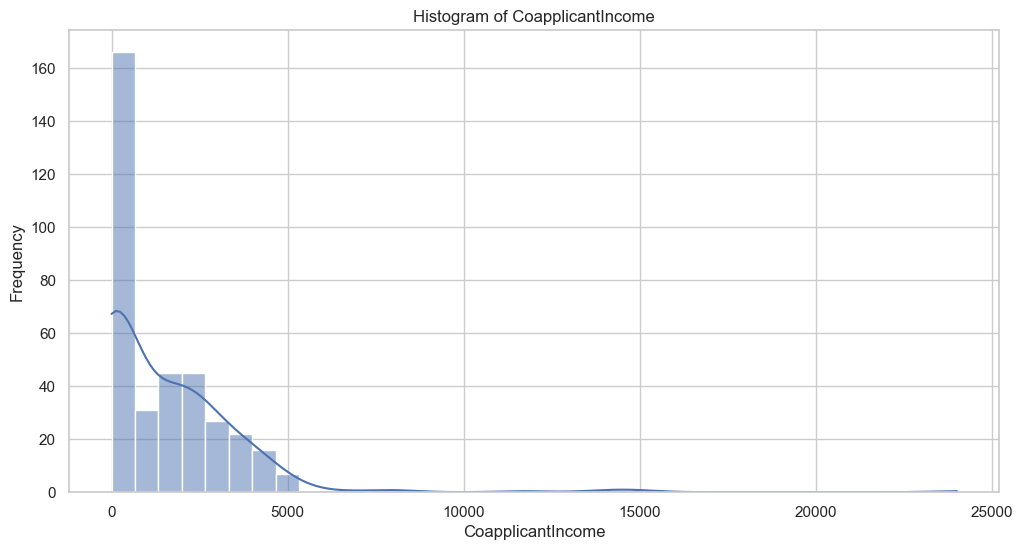

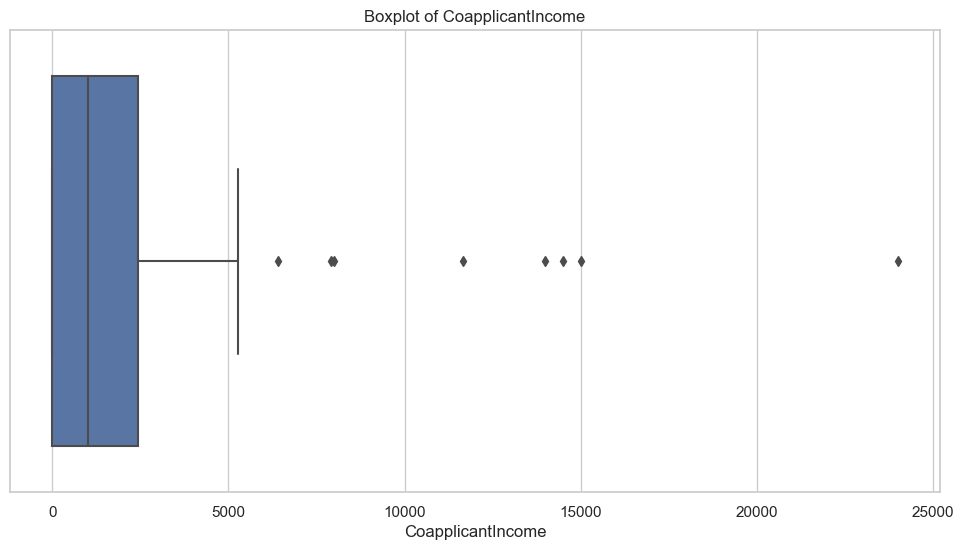

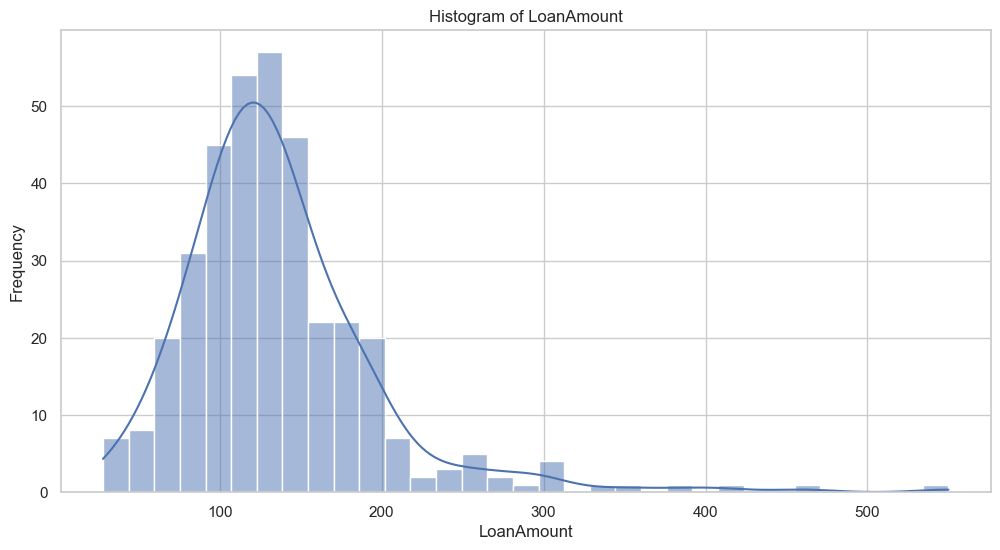

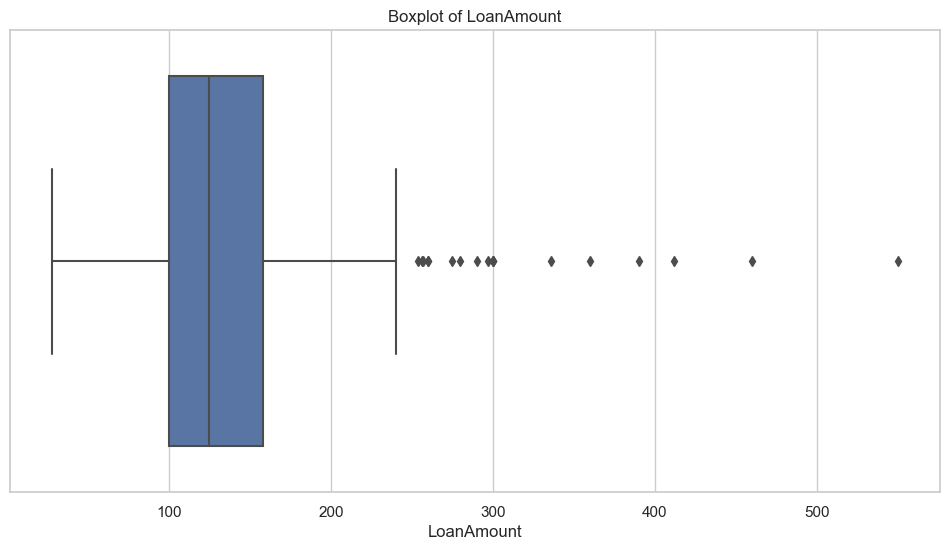

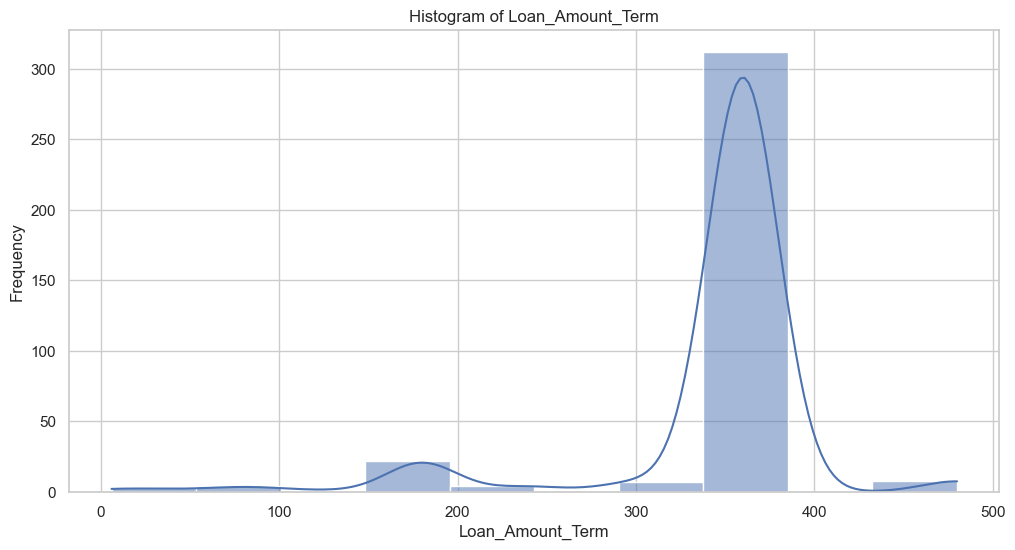

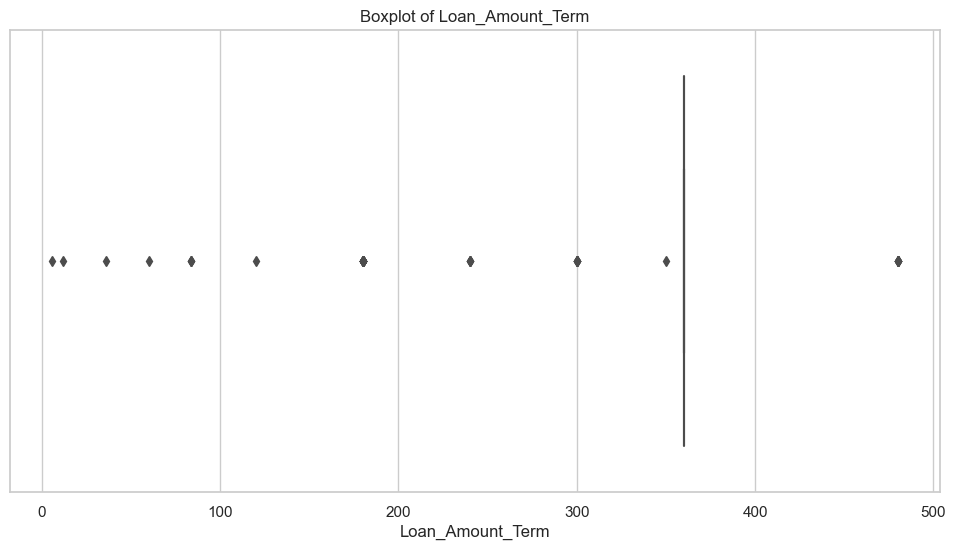

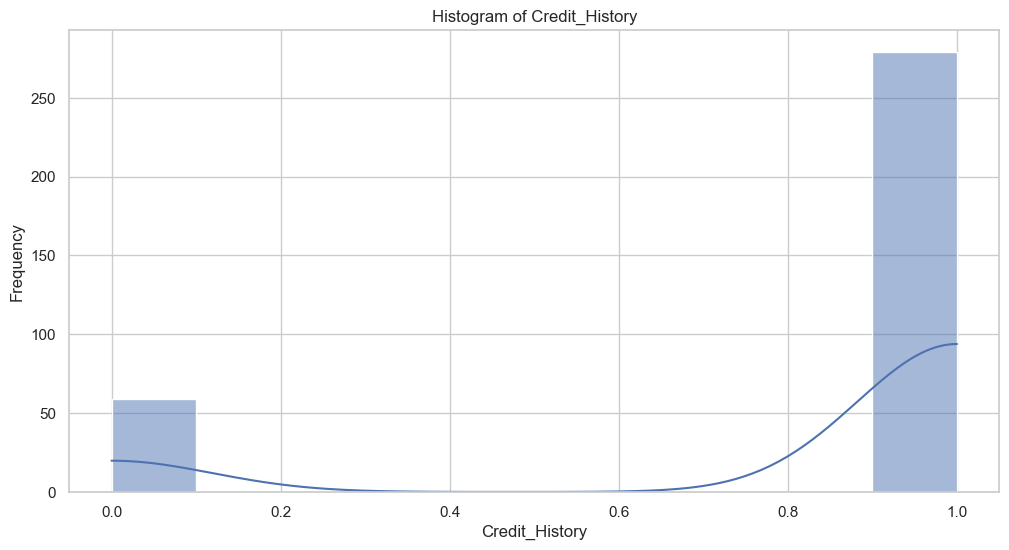

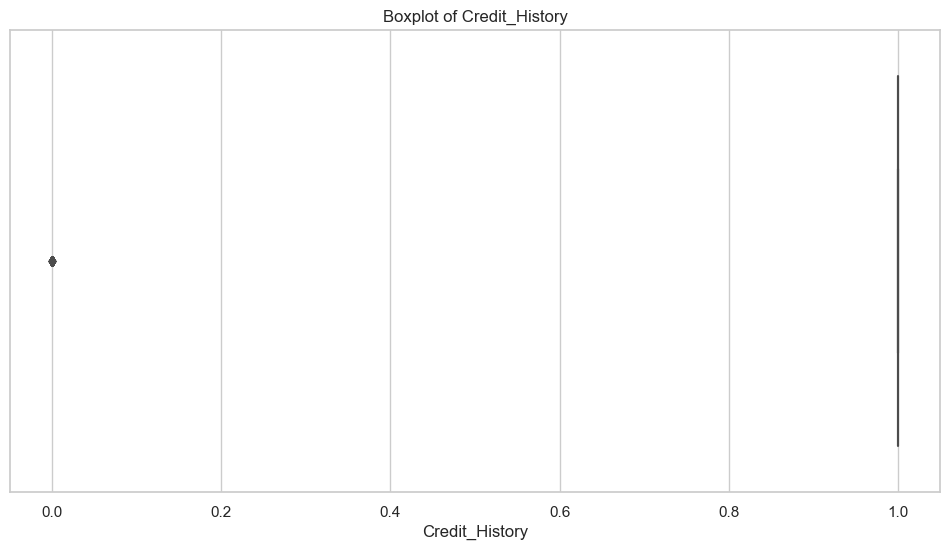

In [7]:
# Univariate Analysis - Numeric Columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

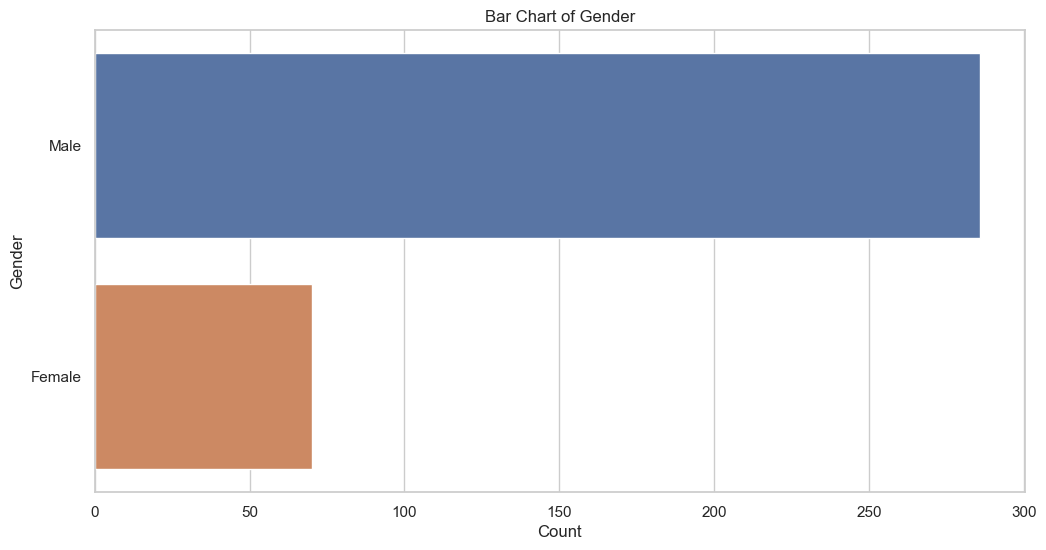

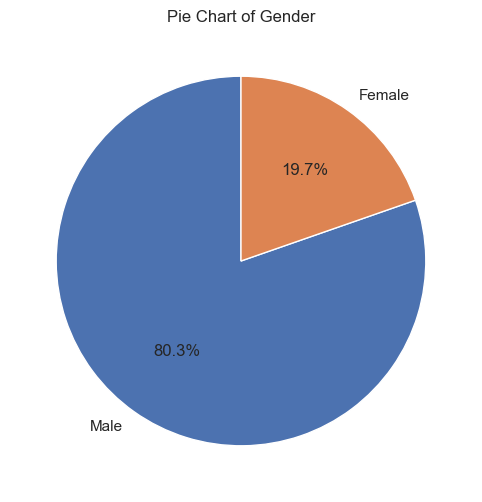

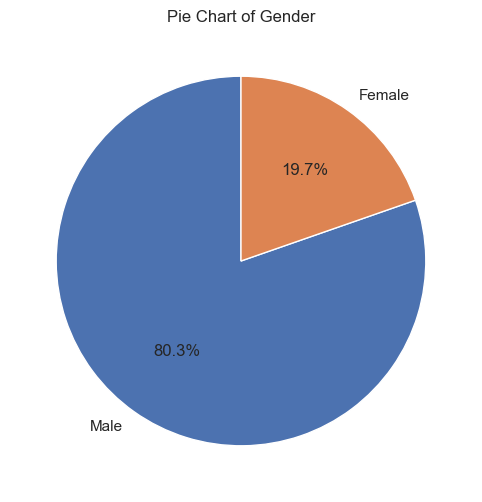

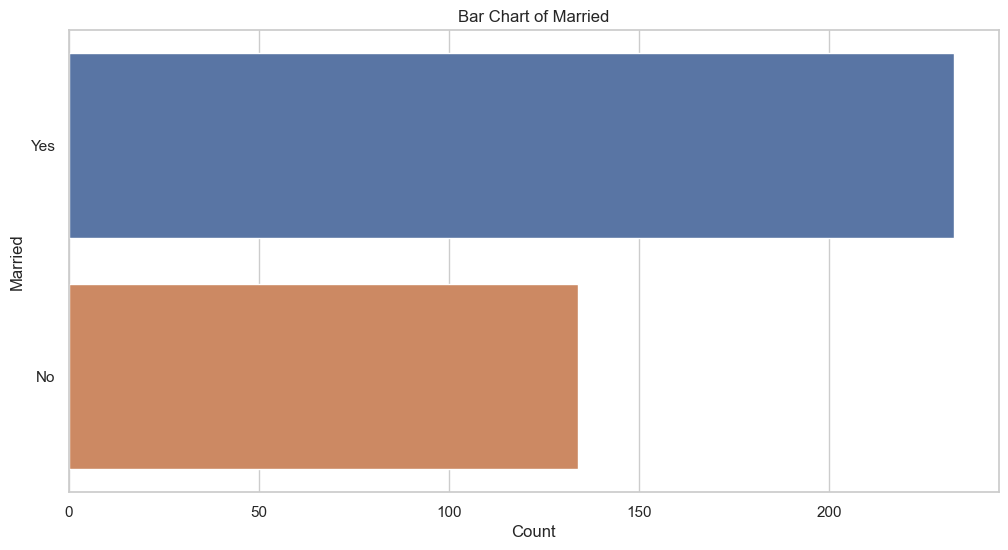

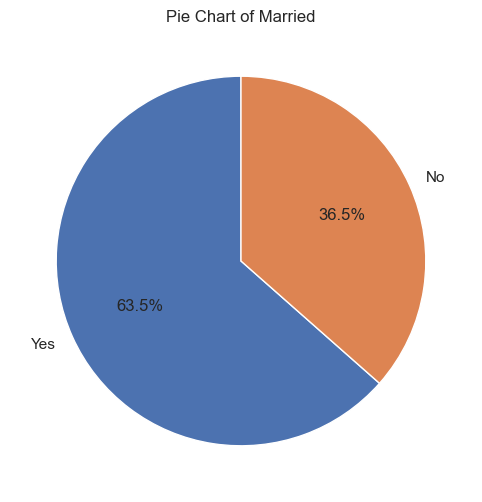

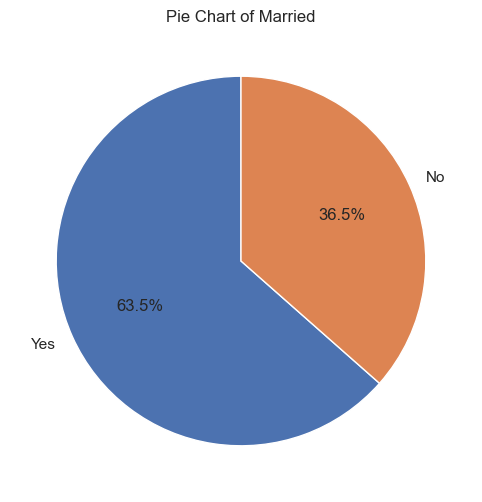

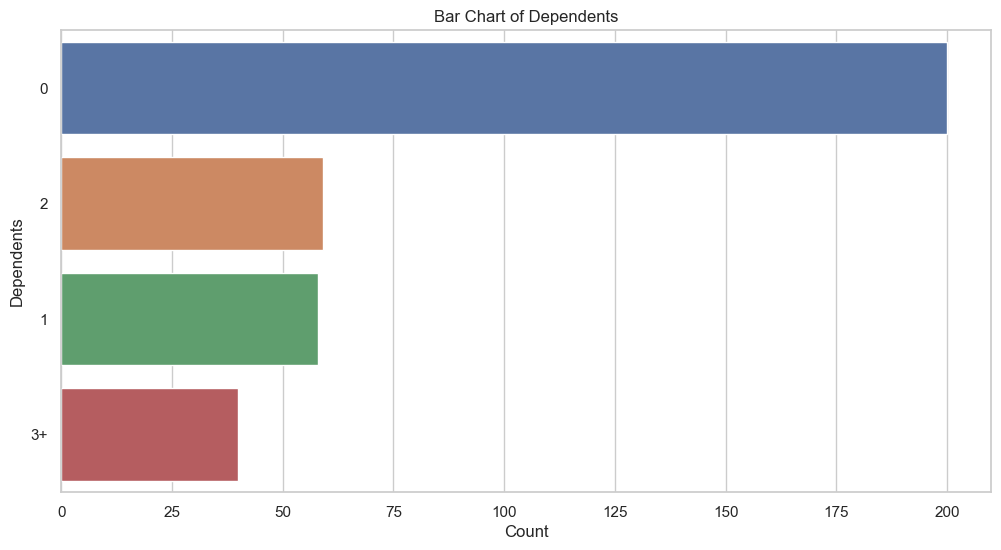

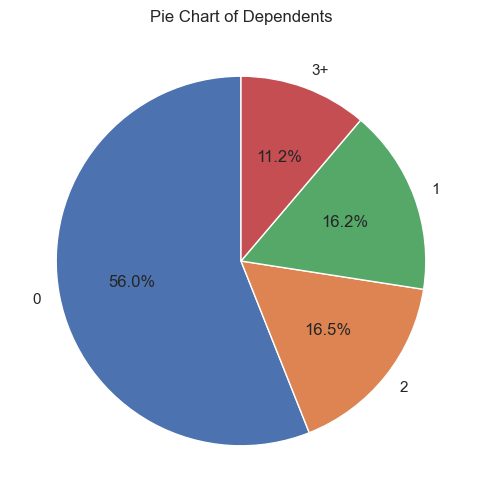

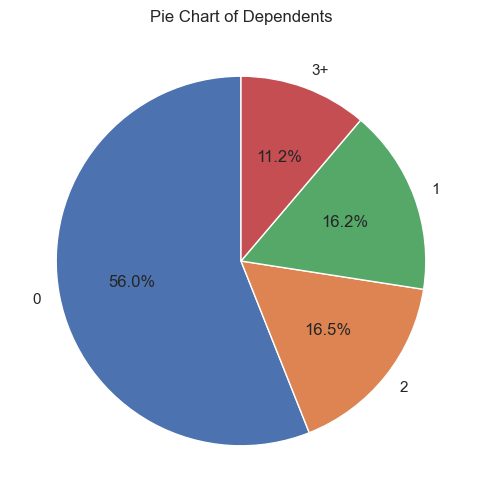

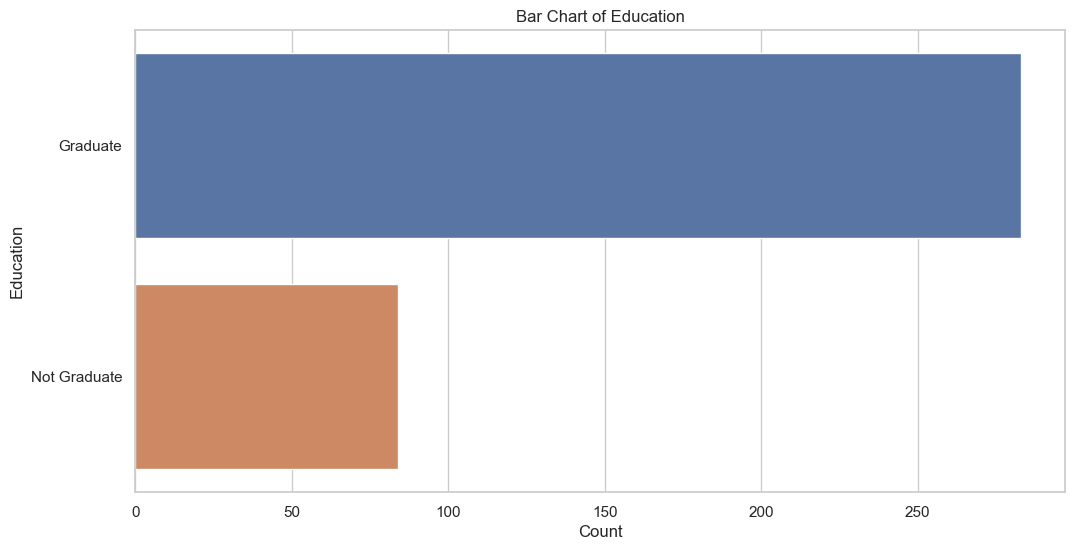

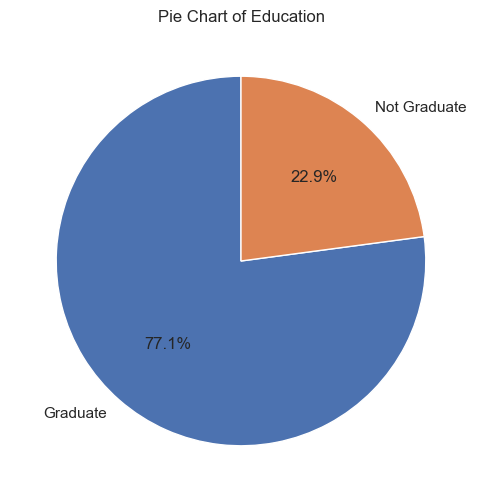

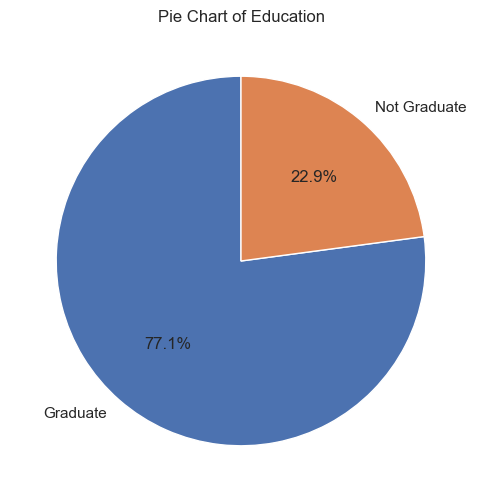

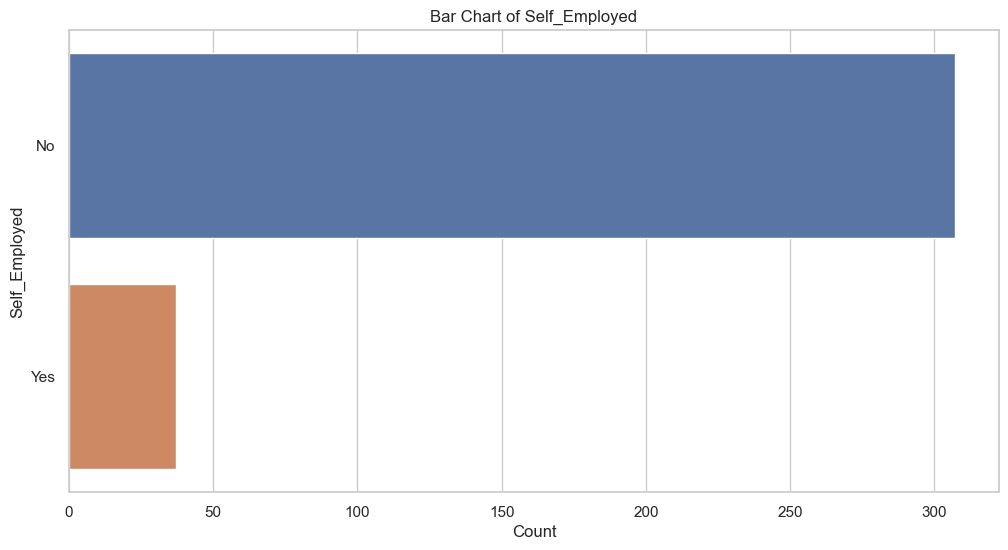

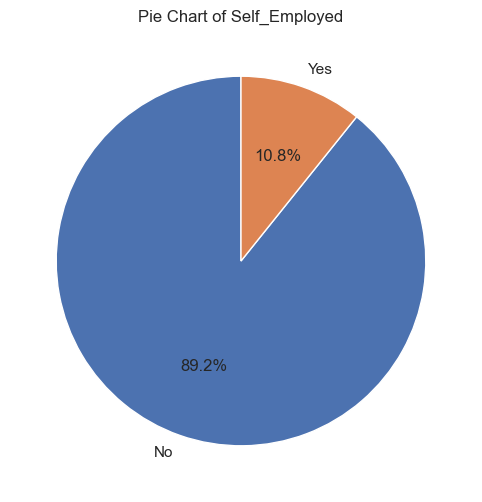

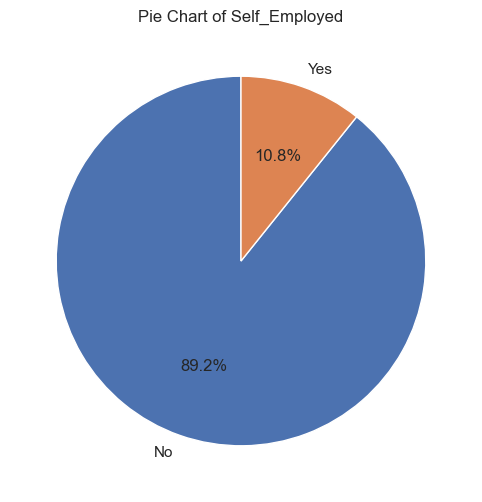

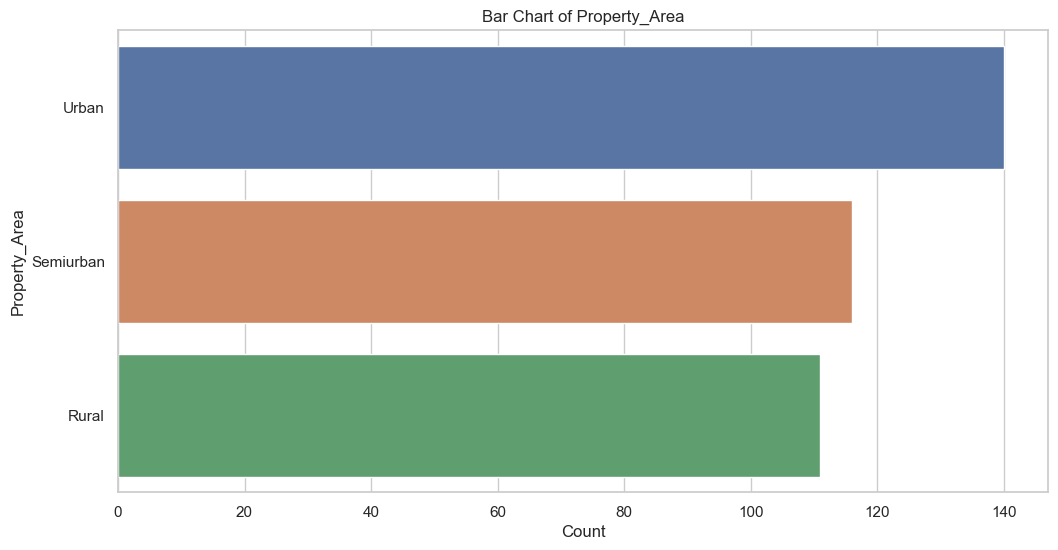

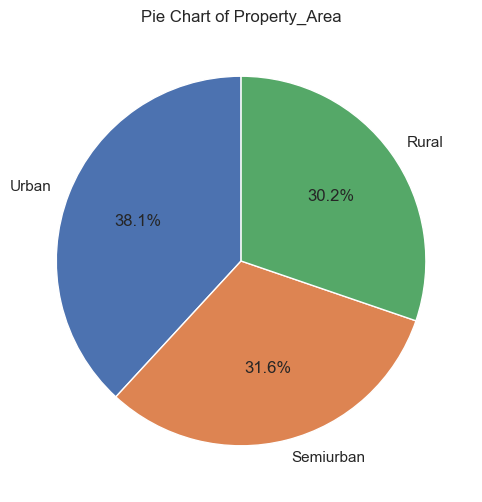

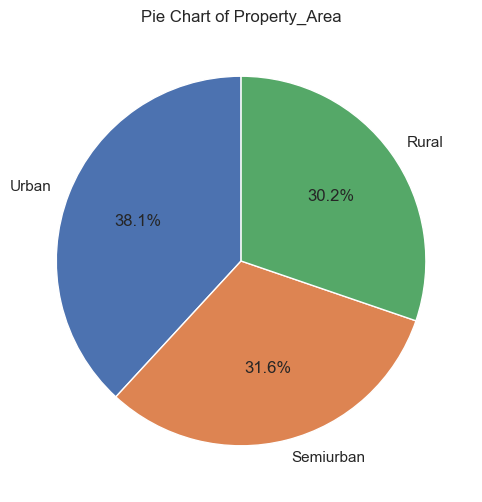

In [9]:
# Univariate Analysis - Categorical Columns
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Loan_ID']

for col in cat_cols:
    # Bar Chart
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Bar Chart of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

    # Pie Chart
    if df[col].nunique() <= 10:
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f"Pie Chart of {col}")
        plt.ylabel("")
        plt.show()

    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
    plt.show()

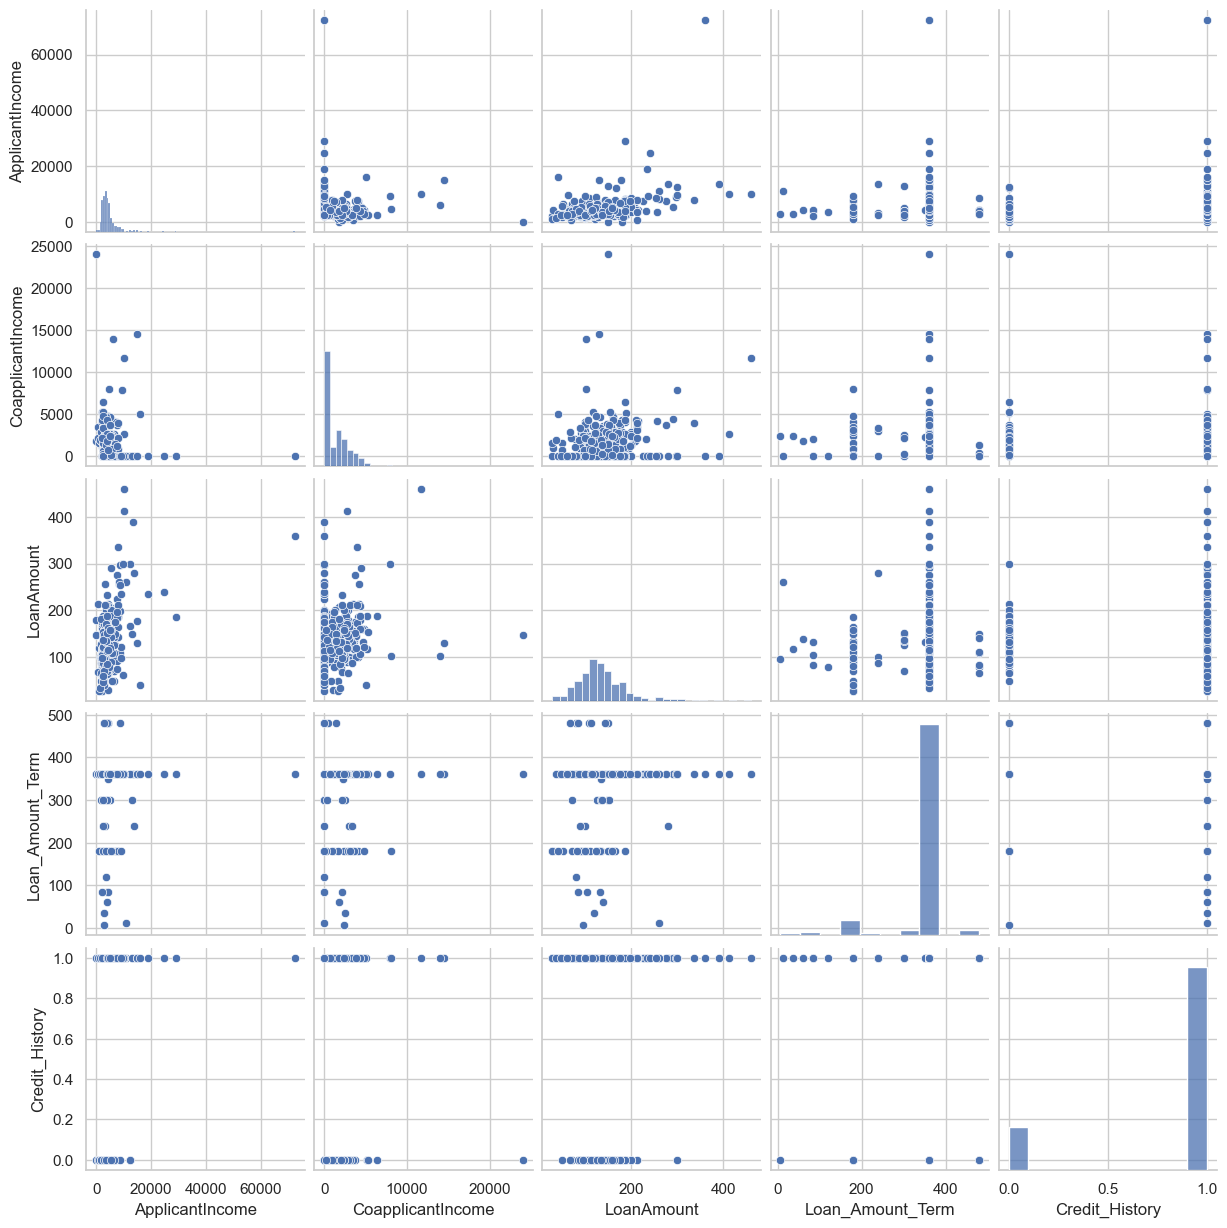

In [10]:
# Bivariate Analysis - Numeric vs Numeric
sns.pairplot(df[numeric_cols].dropna())
plt.show()

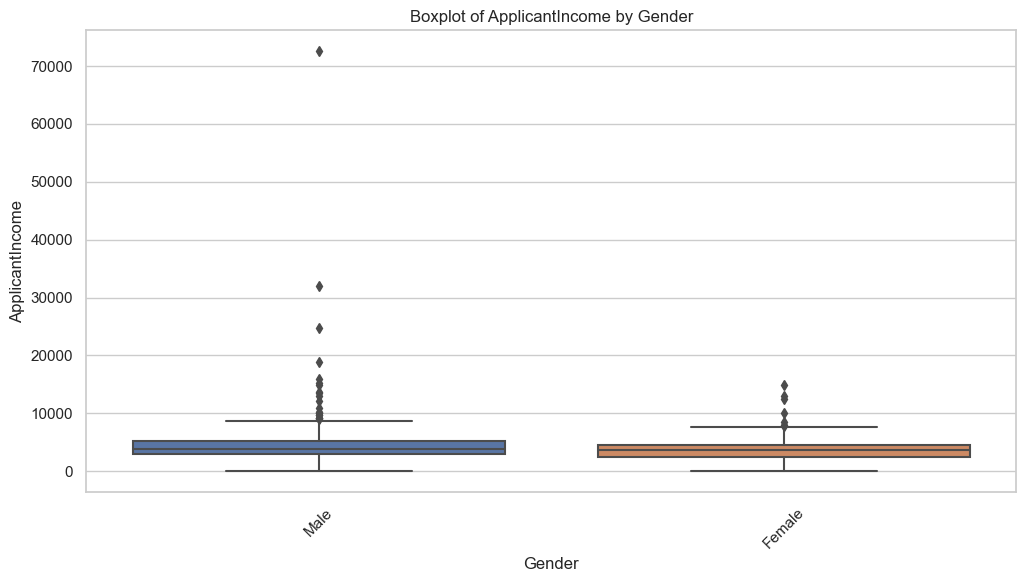

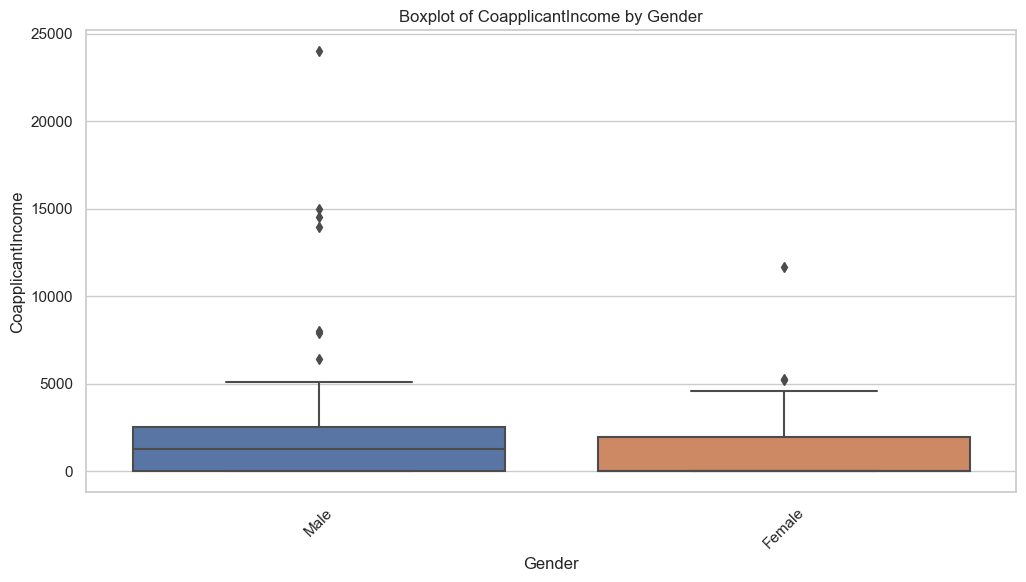

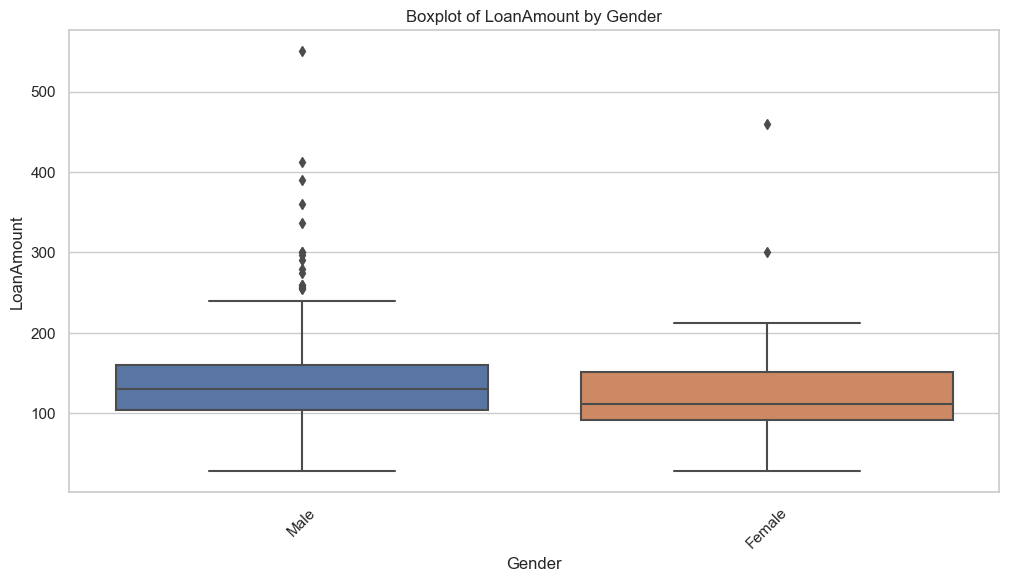

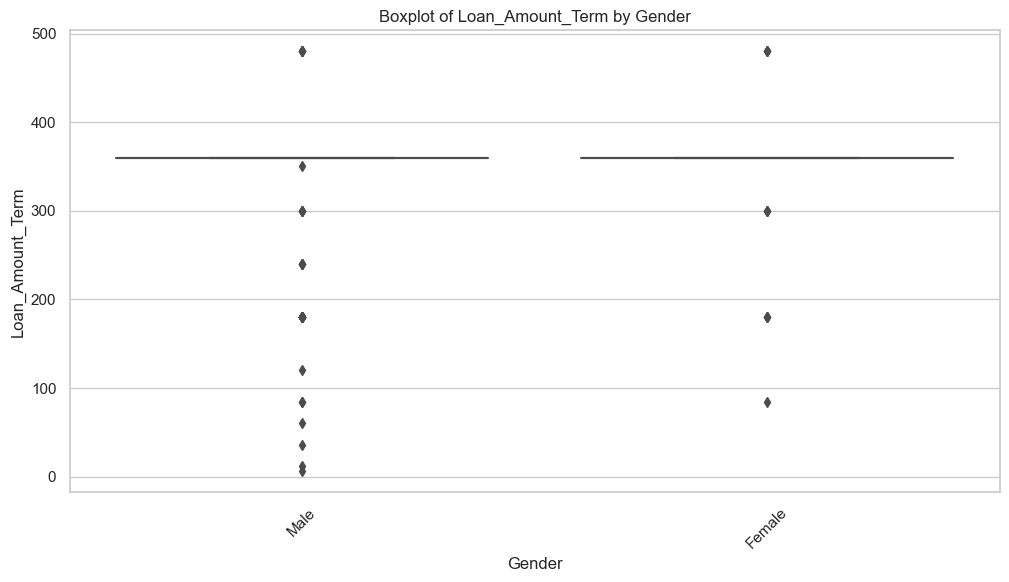

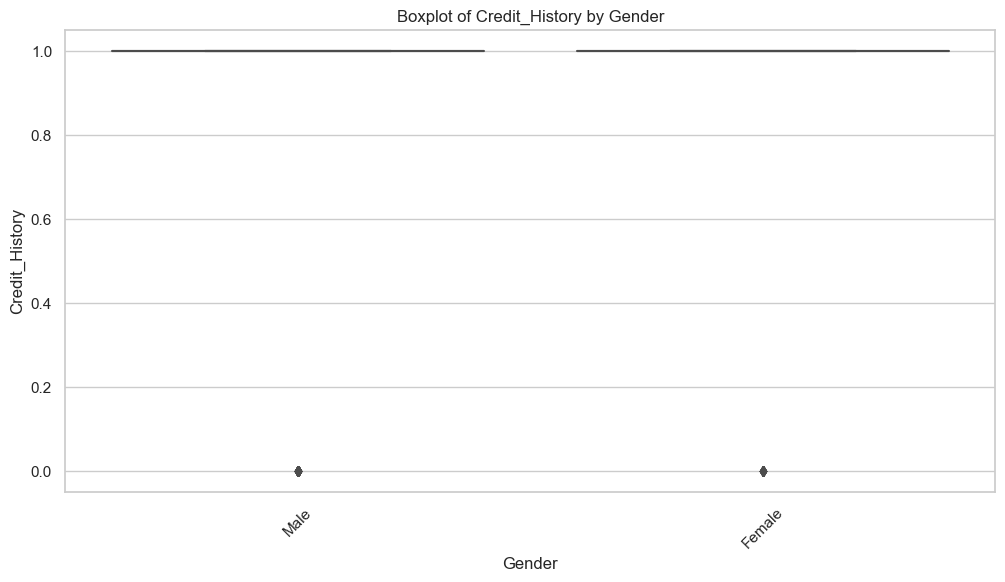

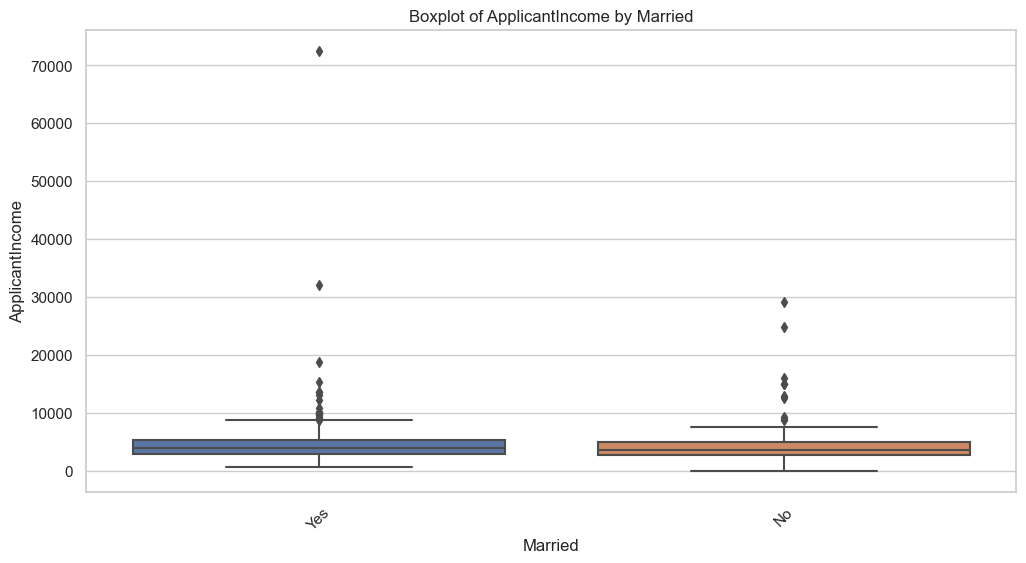

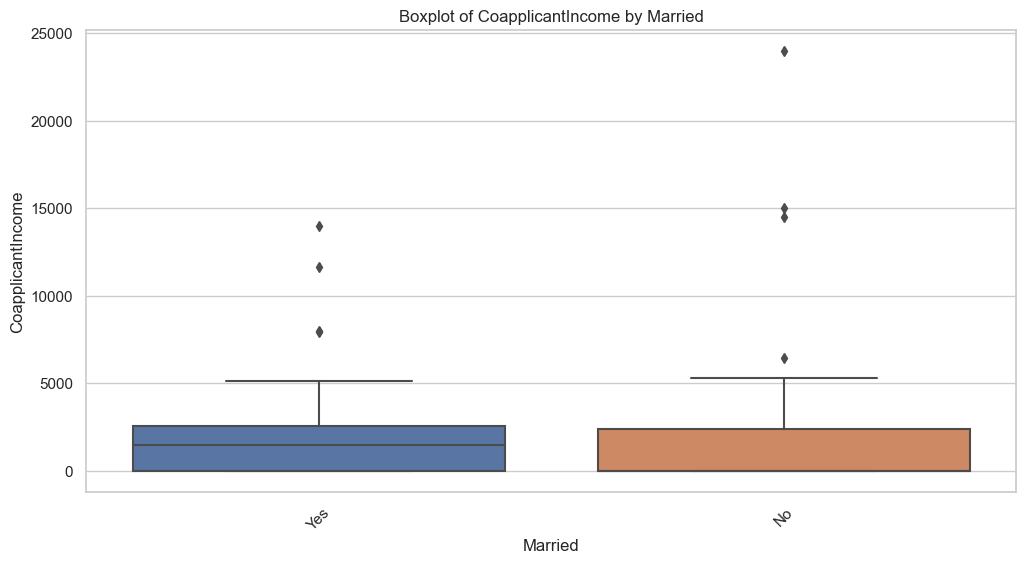

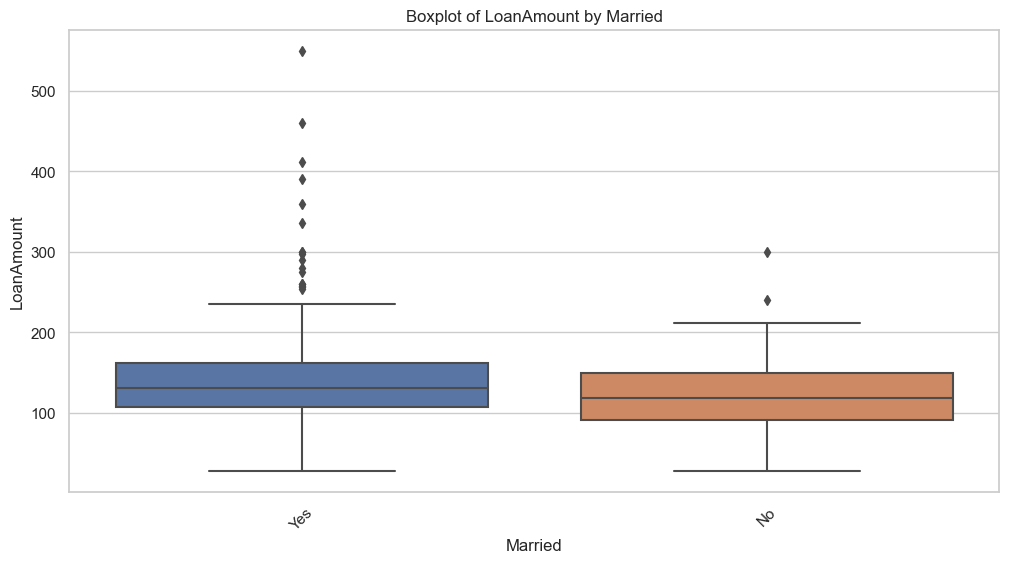

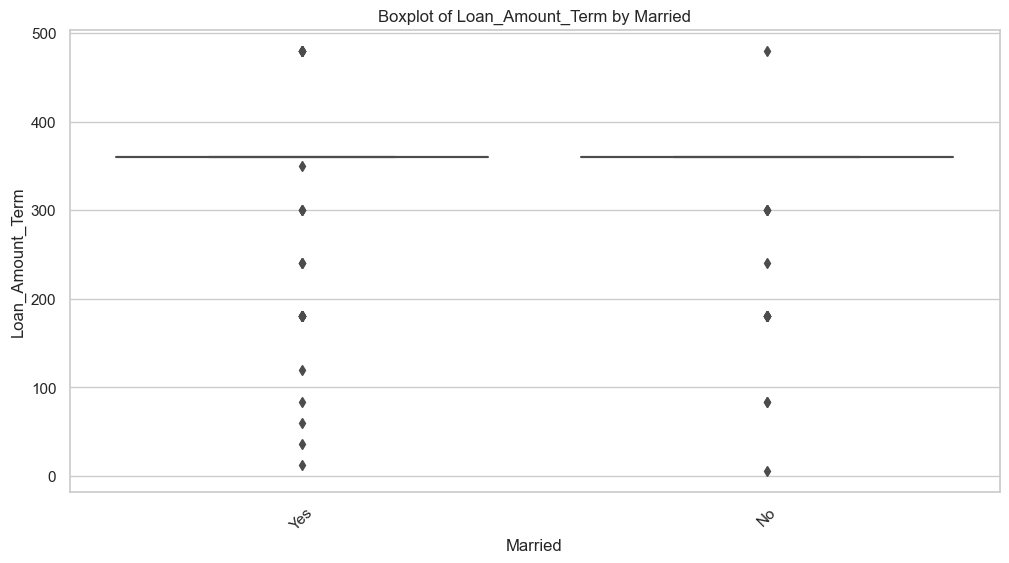

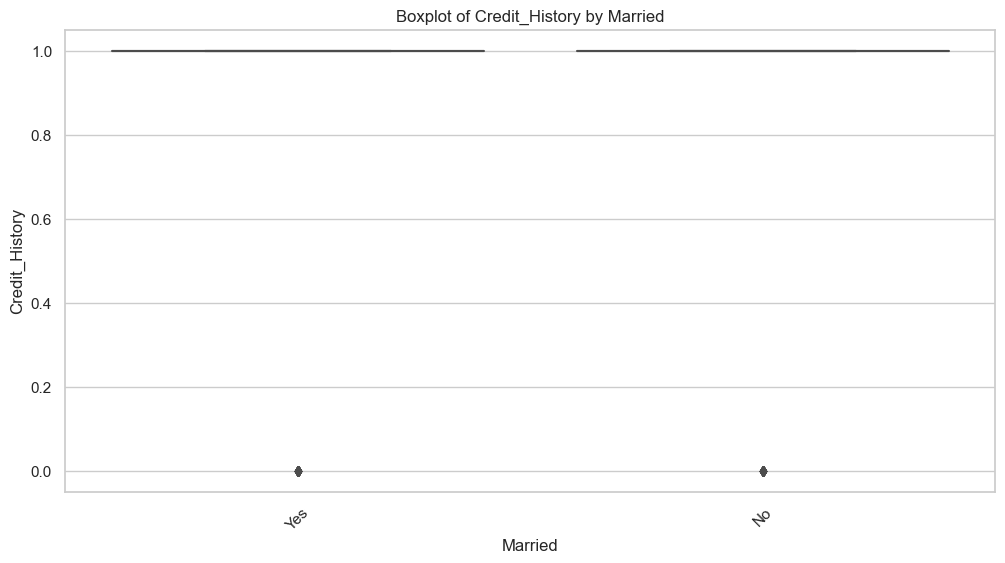

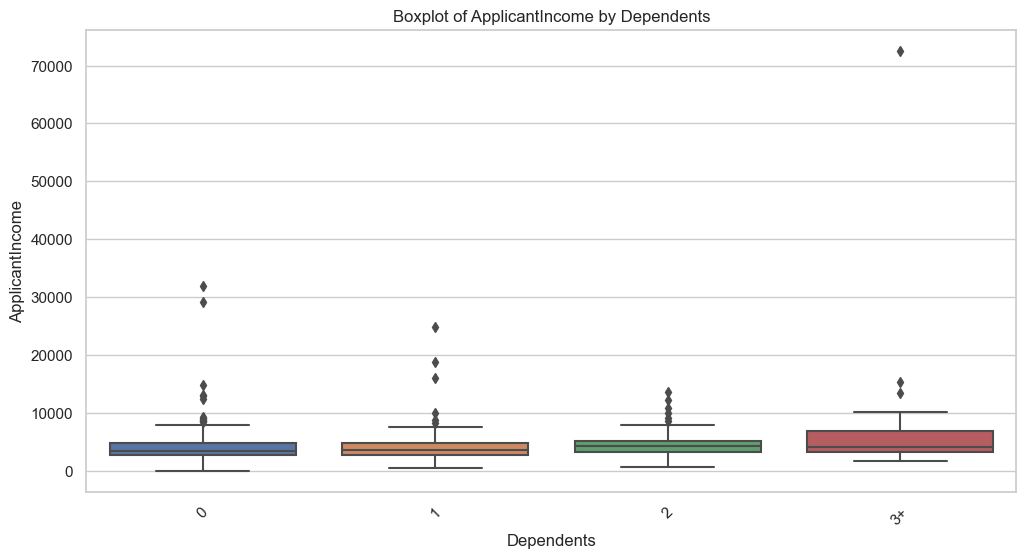

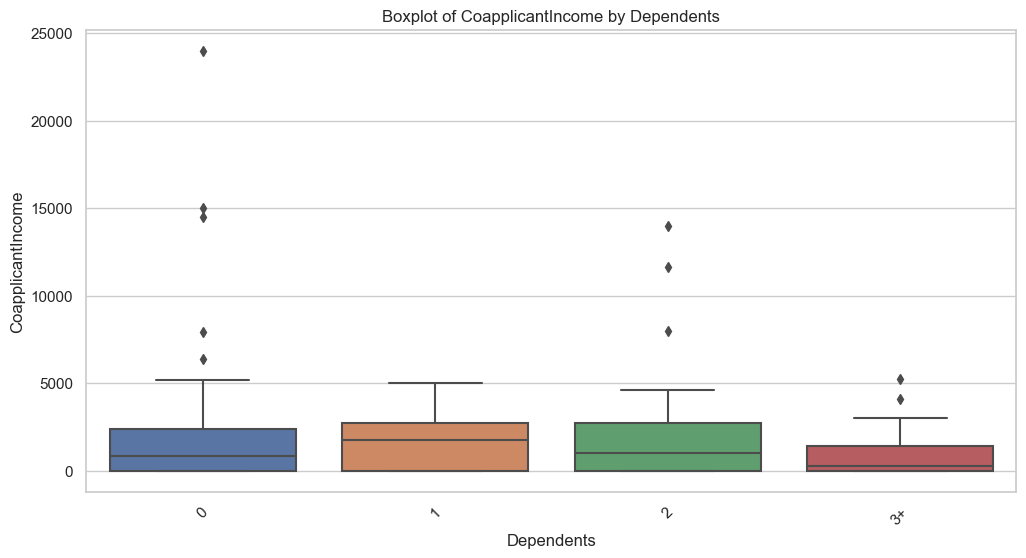

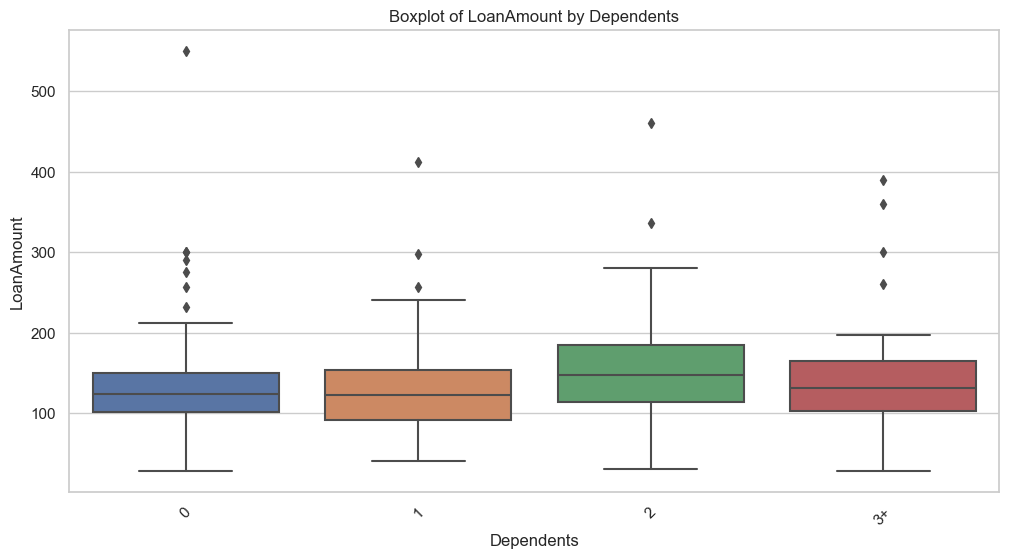

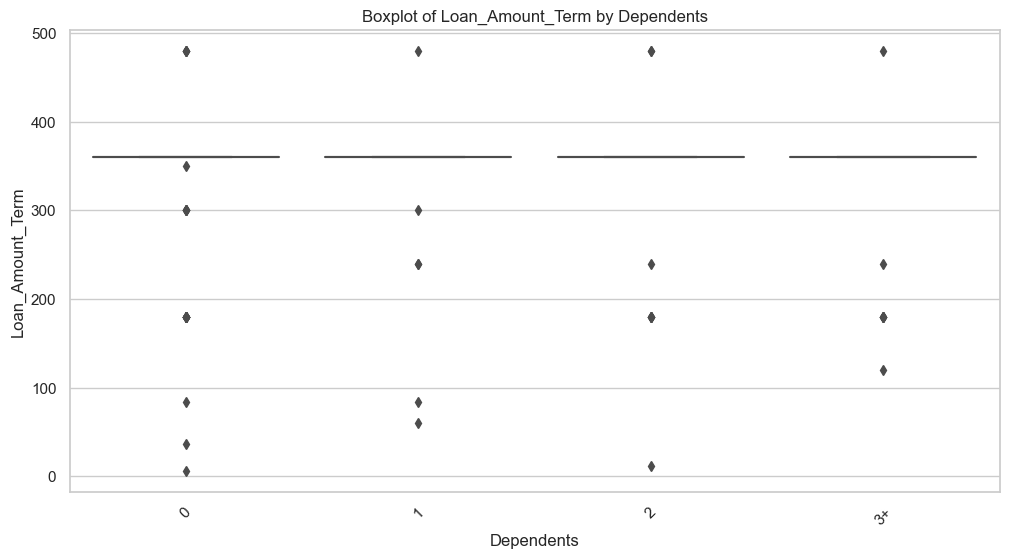

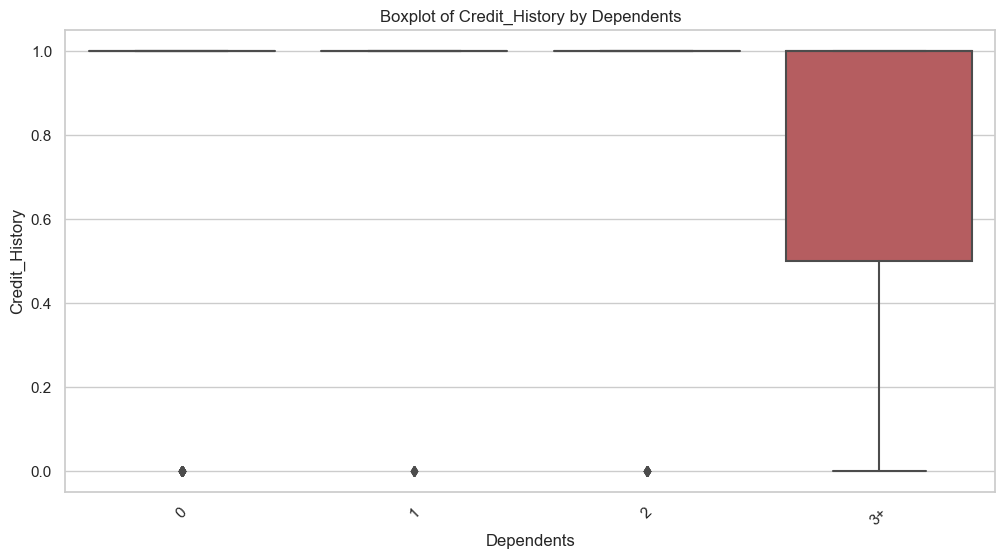

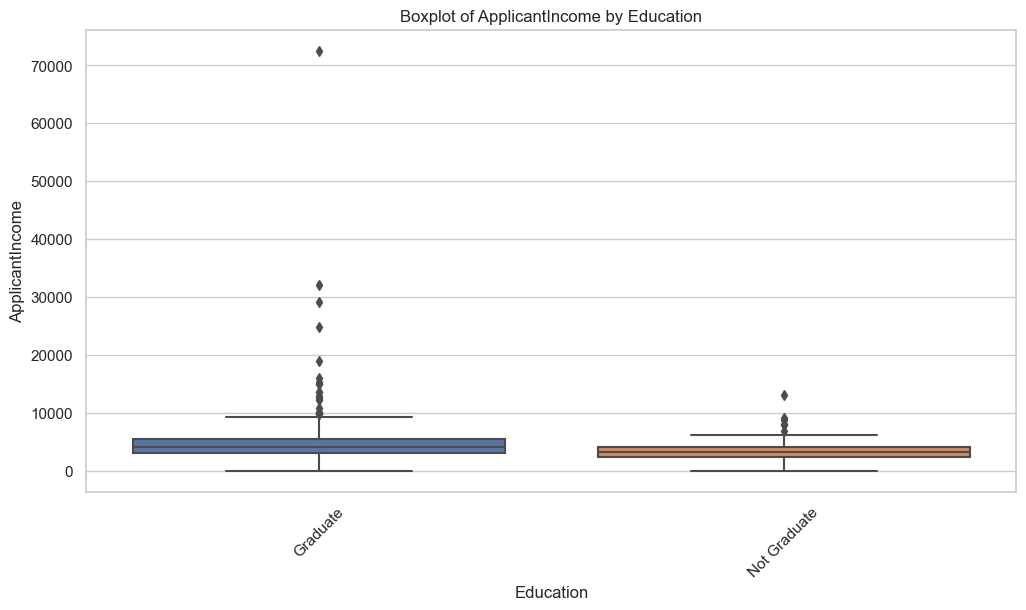

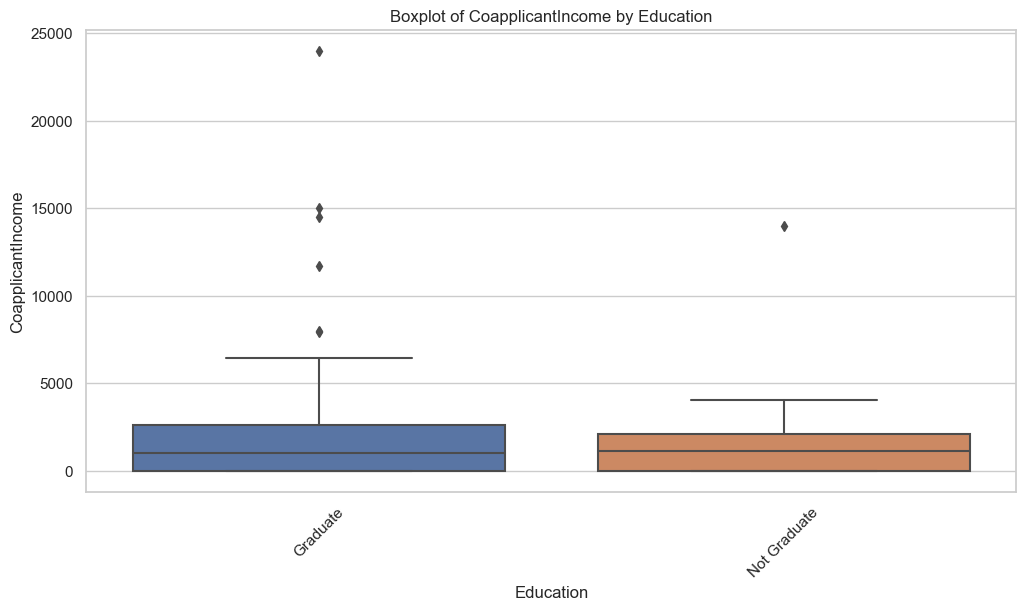

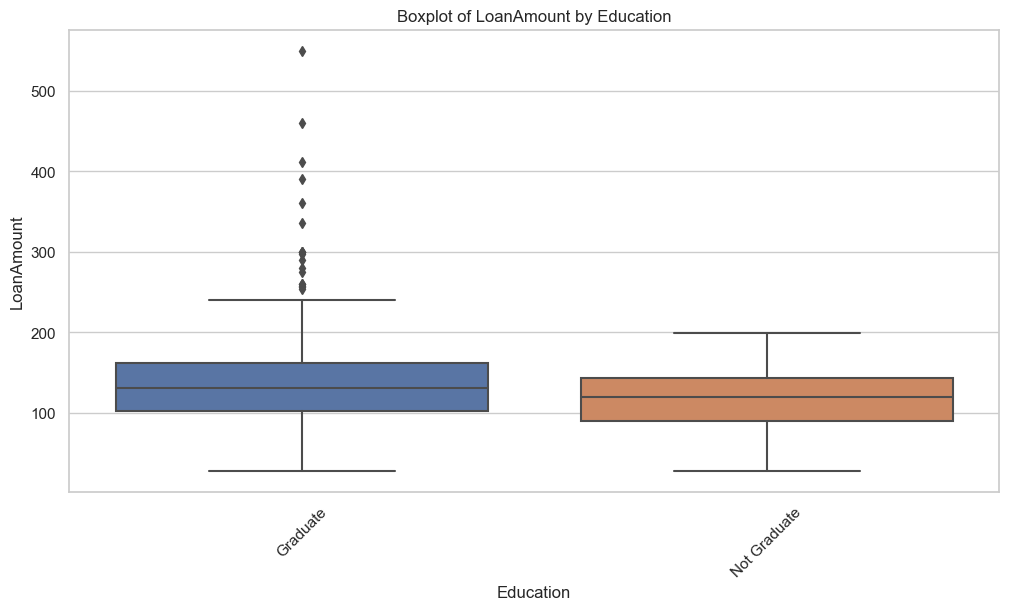

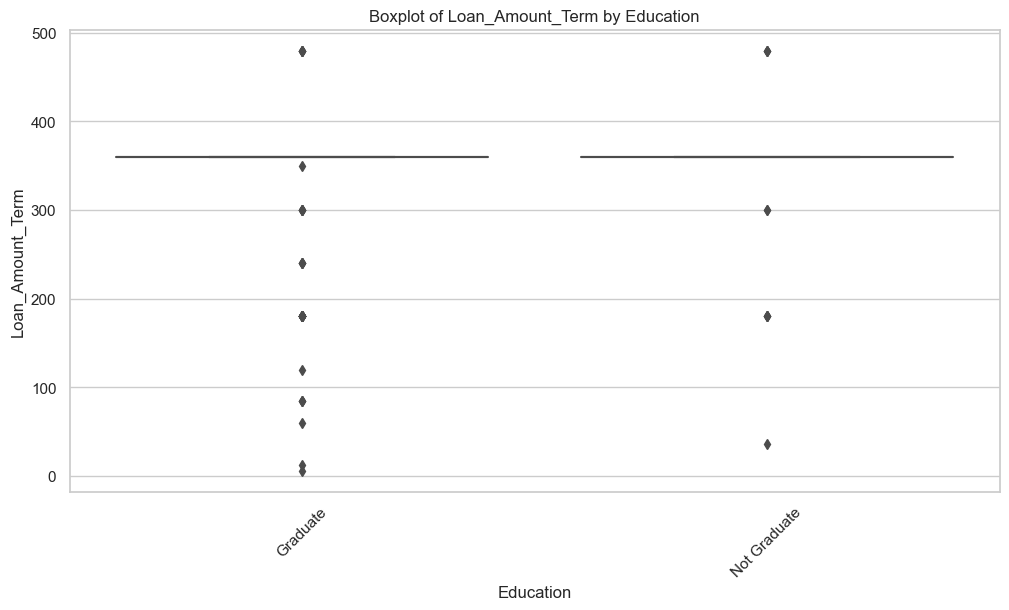

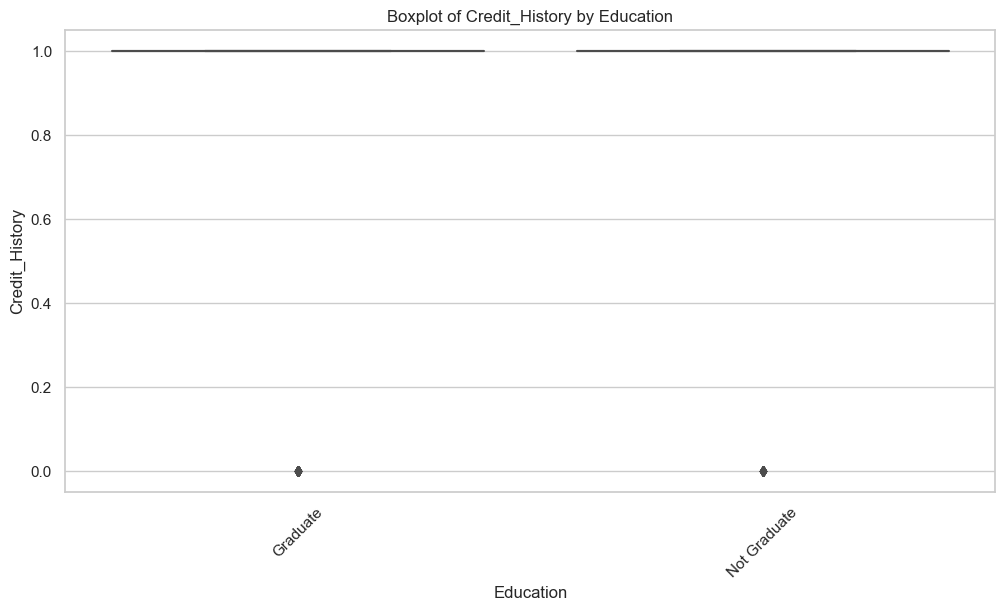

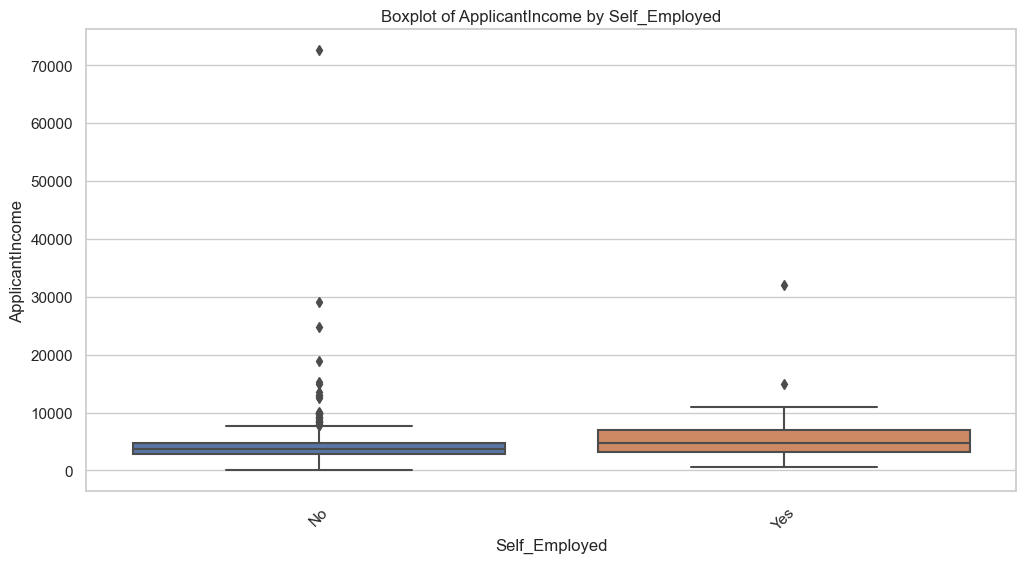

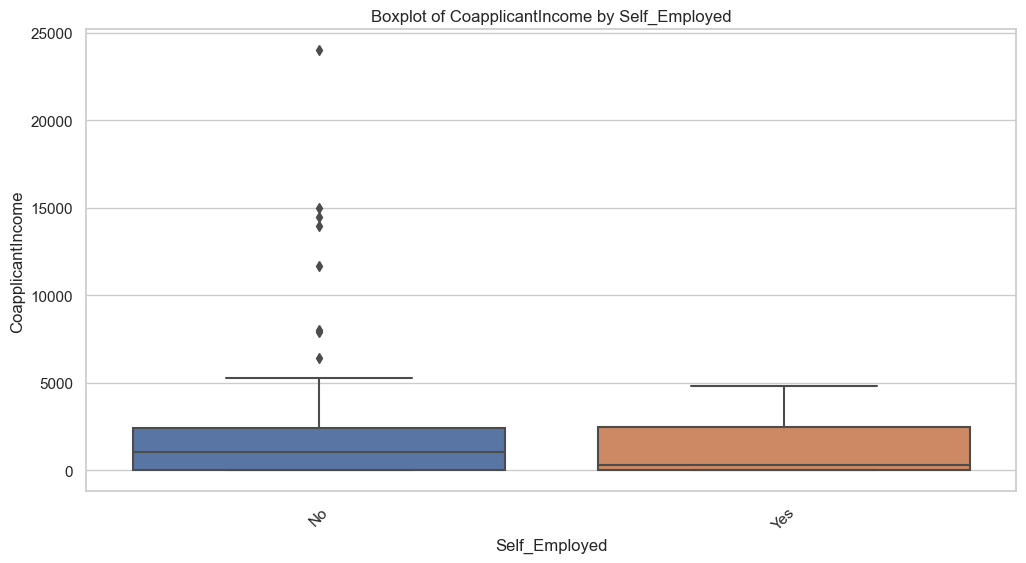

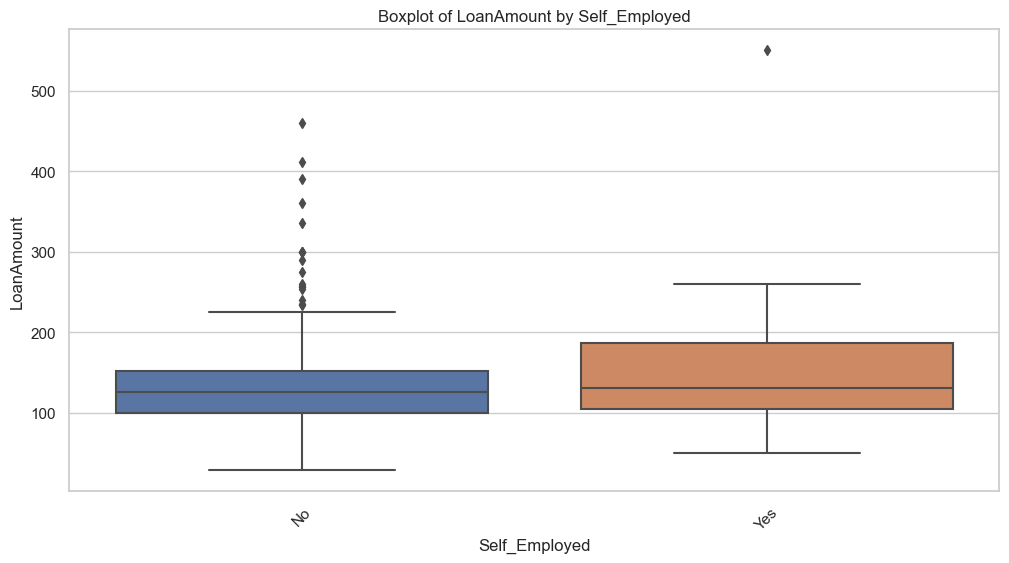

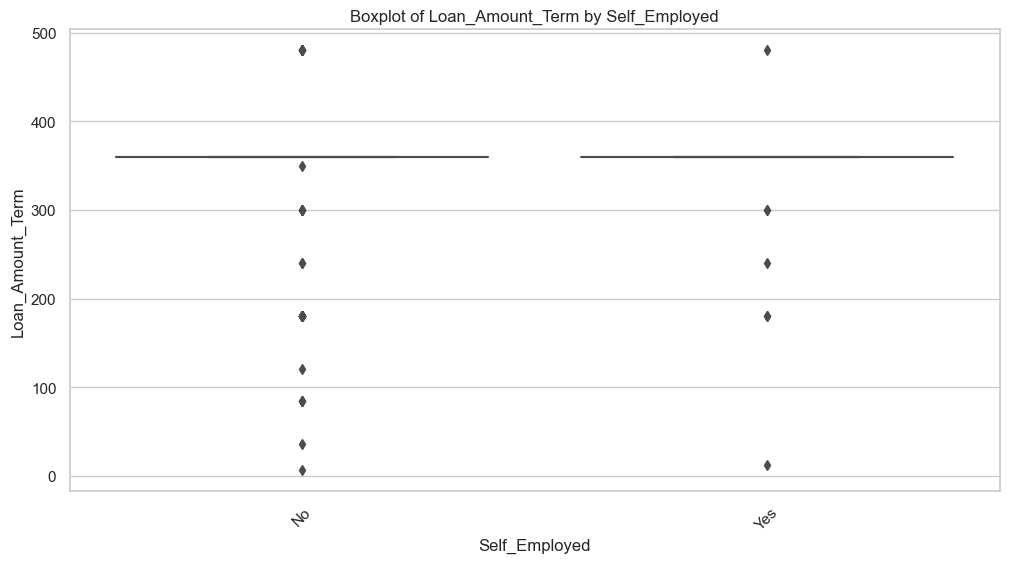

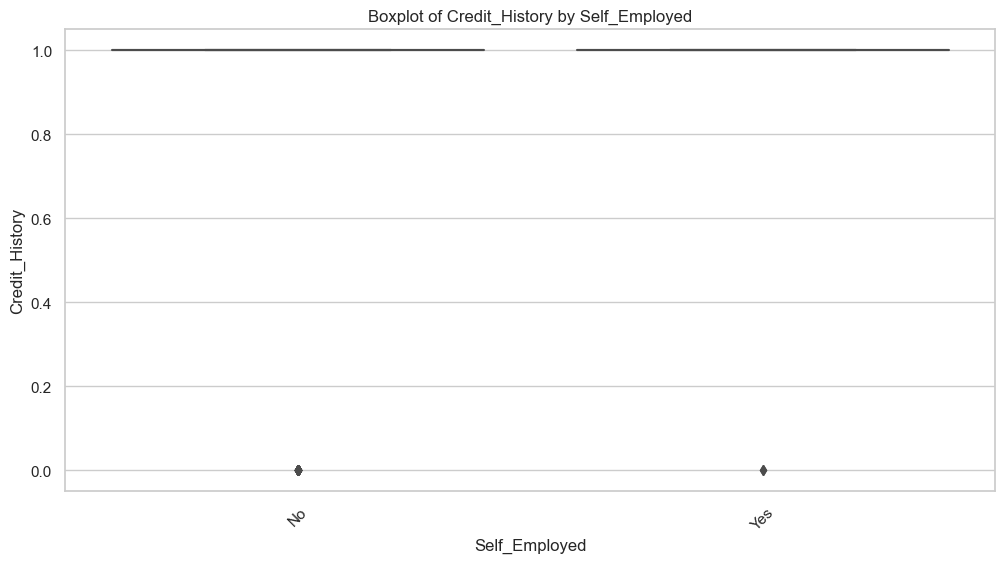

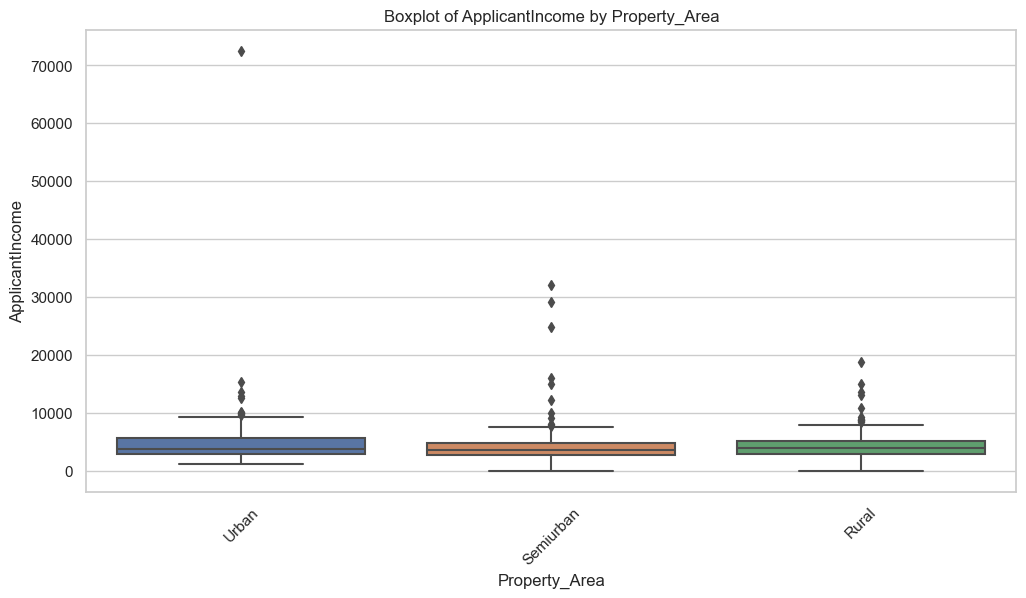

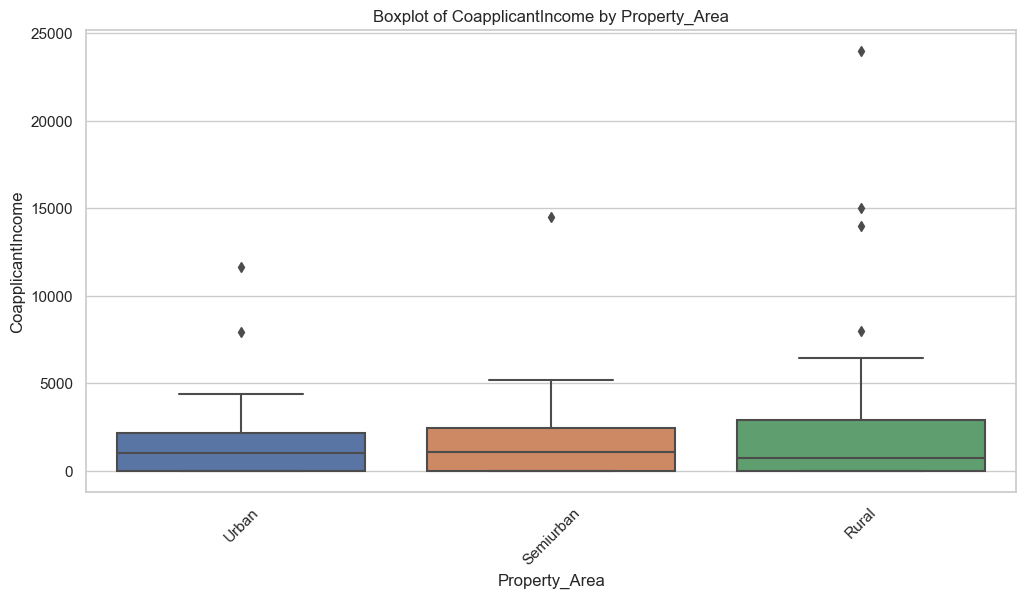

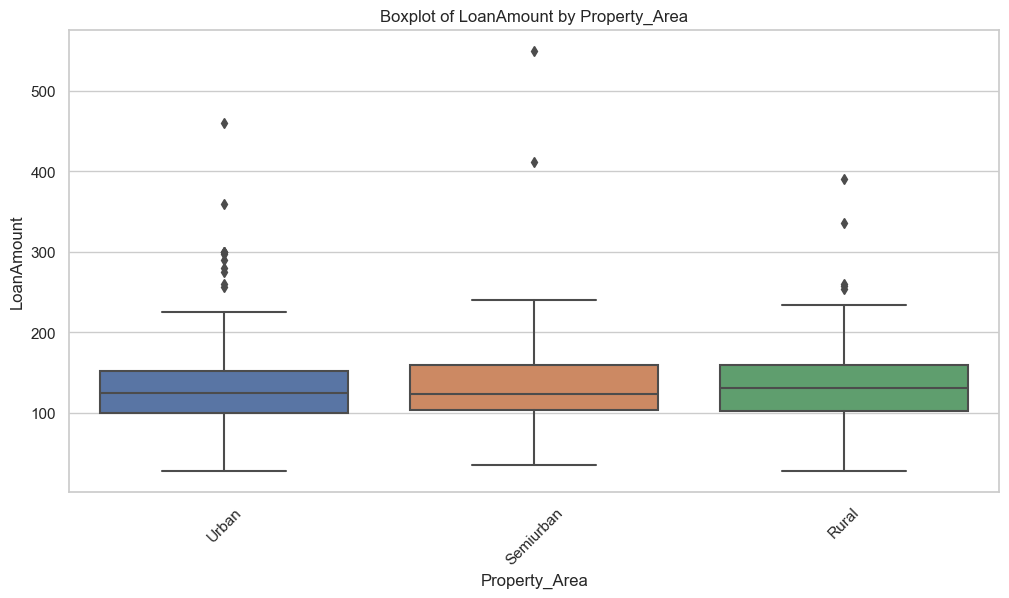

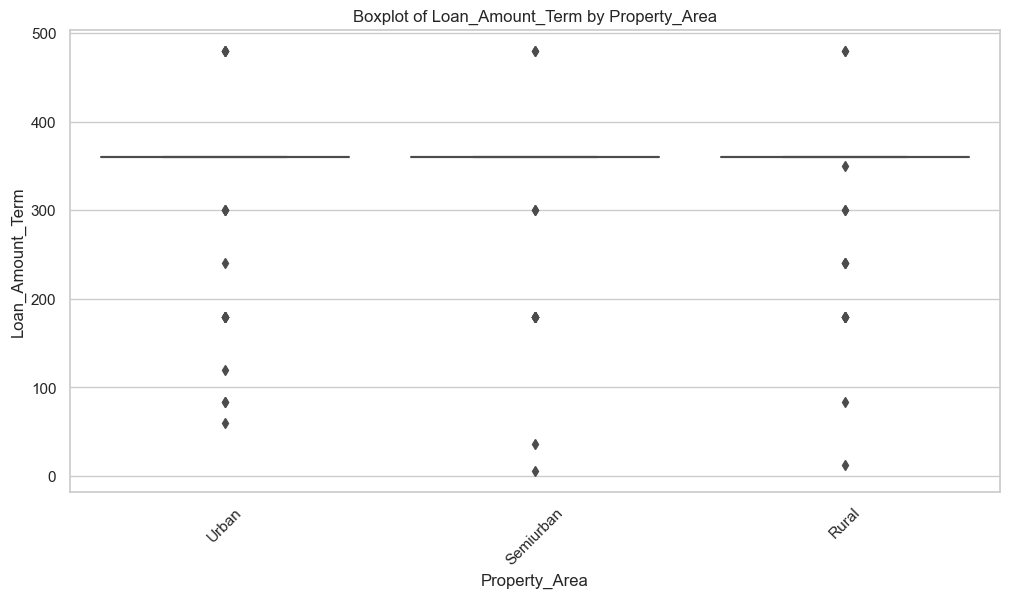

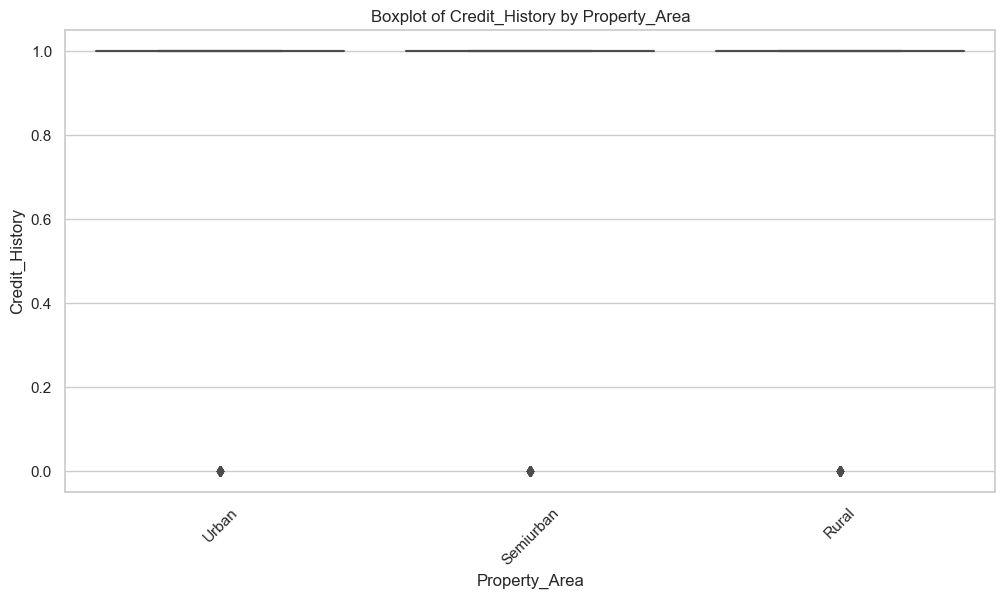

In [11]:
# Bivariate Analysis - Categorical vs Numeric
for col in cat_cols:
    for num in numeric_cols:
        sns.boxplot(x=col, y=num, data=df)
        plt.title(f"Boxplot of {num} by {col}")
        plt.xticks(rotation=45)
        plt.show()

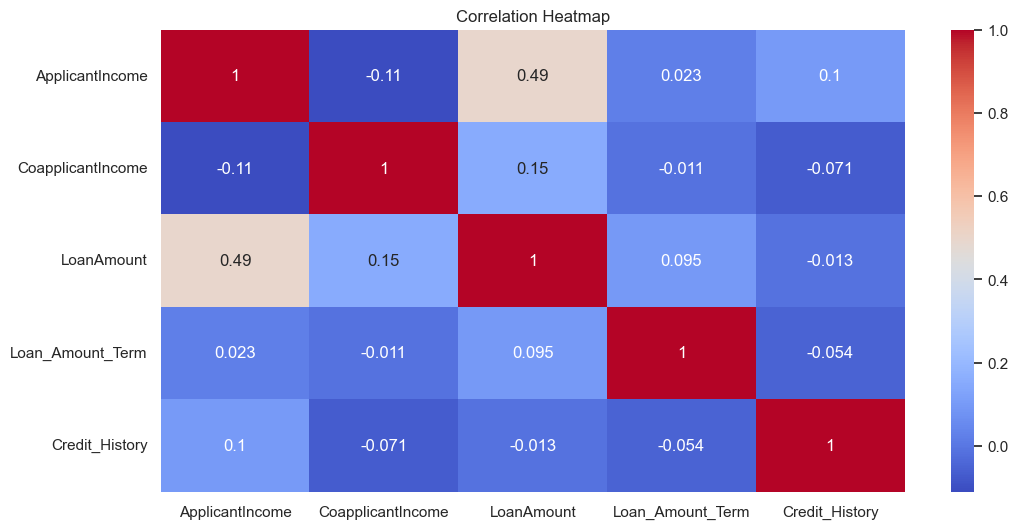

In [12]:
# Correlation Heatmap
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

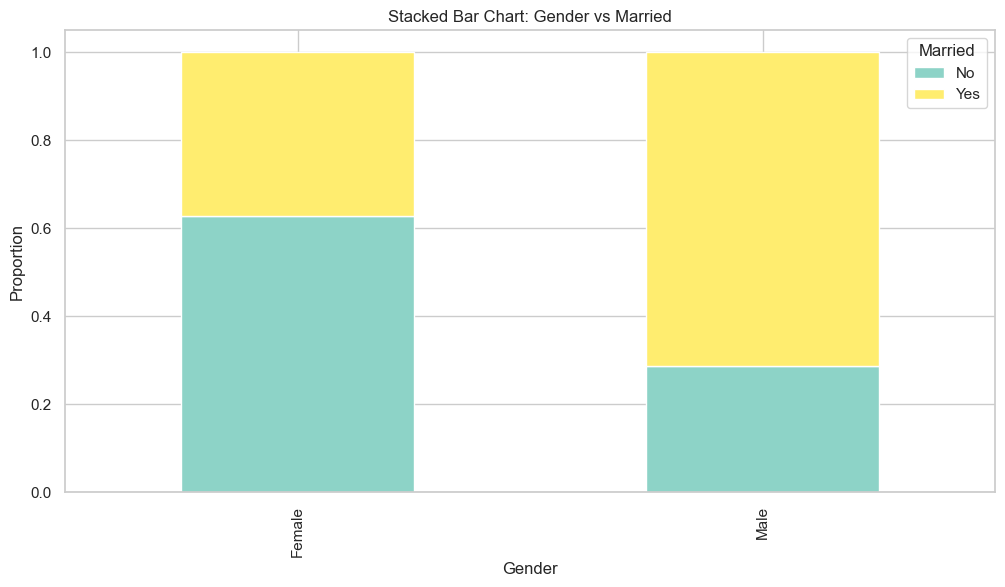

In [13]:
# Multivariate Analysis - Stacked Bar Chart (Categorical vs Categorical)
if len(cat_cols) >= 2:
    stacked = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]], normalize='index')
    stacked.plot(kind='bar', stacked=True, colormap='Set3')
    plt.title(f"Stacked Bar Chart: {cat_cols[0]} vs {cat_cols[1]}")
    plt.xlabel(cat_cols[0])
    plt.ylabel("Proportion")
    plt.show()

In [14]:
# Conclusion
print("\n--- Conclusion ---")
print("1. Dataset explored using univariate, bivariate, and multivariate analysis.")
print("2. Missing values and outliers were checked.")
print("3. Visualizations revealed trends across applicant income, loan amount, and approval status.")
print("4. Correlations and boxplots gave insight into category-wise differences.")


--- Conclusion ---
1. Dataset explored using univariate, bivariate, and multivariate analysis.
2. Missing values and outliers were checked.
3. Visualizations revealed trends across applicant income, loan amount, and approval status.
4. Correlations and boxplots gave insight into category-wise differences.
